In [2]:
import warnings
warnings.filterwarnings('ignore')
import html5lib
import requests
import io

In [3]:
import pandas as pd
import numpy as np

# Reading the Basic Patterns

In [4]:
url1 = 'https://drive.google.com/file/d/1gLzf6ssZdAwMkIs8UgiBF7QeKiFm_d_q/view?usp=share_link'
url1 = 'https://drive.google.com/uc?id=' + url1.split('/')[-2]
df = pd.read_csv(url1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


We see all the colums here are numeric one. So there is no need for mapping.

In [6]:
from datetime import datetime

#we will see how certain variables act over the timeline

df['day'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df = df.drop(['dteday'], axis = 1)
df.shape

(730, 16)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Rides'),
 Text(0.5, 1.0, 'Rides over the timeframe')]

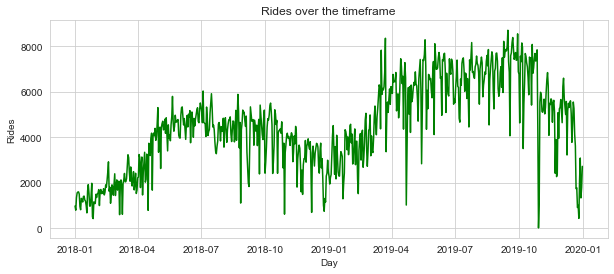

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
x1 = sns.lineplot(data=df, color = 'green', x='day', y='cnt')
x1.set(xlabel = 'Day', ylabel = 'Rides', title = 'Rides over the timeframe')

[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Air Temperature'),
 Text(0.5, 1.0, 'Seasonality of Temperature')]

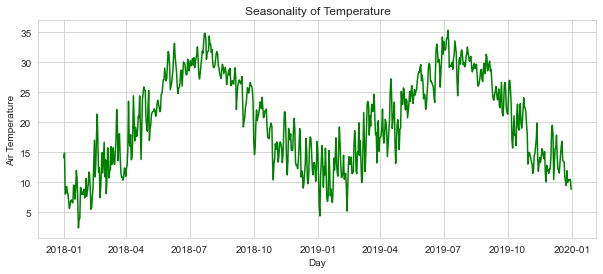

In [9]:
fig, ax = plt.subplots(figsize=(10,4))
x2 = sns.lineplot(data=df, color = 'green', x='day', y='temp')
x2.set(xlabel = 'Day', ylabel = 'Air Temperature', title = 'Seasonality of Temperature')

[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Humidity'),
 Text(0.5, 1.0, 'Seasonality of Humidity')]

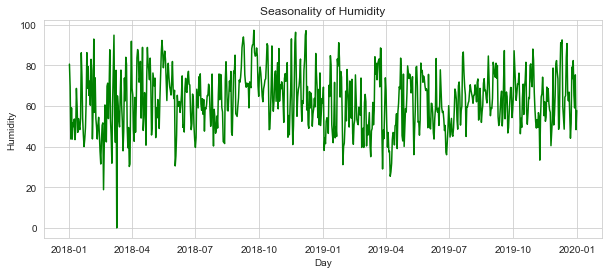

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
x3 = sns.lineplot(data=df, color = 'green', x='day', y='hum')
x3.set(xlabel = 'Day', ylabel = 'Humidity', title = 'Seasonality of Humidity')

In [11]:
df = df.drop(['day'], axis = 1)

* The peaks and valleys of Air Temperature and the Counts roughly coincide. While Humidity shows no such relation. Additionally Temperature behaves like Air Temperature, and Windspeed behaves like Humidity.

# Understanding and Visualizing the data

In [12]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
df.columns.isnull().sum() # there are no missing values

0

In [14]:
varlist = ['mnth', 'weekday','season', 'weathersit', 'holiday','workingday', 'yr']
def vcountf(x):
    return x.value_counts()

rf = df[varlist].apply(vcountf)
rf

#checking the levels of the categorical variables

,mnth,weekday,season,weathersit,holiday,workingday,yr
0,NaN,104.0,NaN,NaN,709.0,226.0,365.0
1,62.0,105.0,180.0,463.0,21.0,504.0,365.0
2,56.0,105.0,184.0,246.0,NaN,NaN,NaN
3,62.0,104.0,188.0,21.0,NaN,NaN,NaN
4,60.0,104.0,178.0,NaN,NaN,NaN,NaN
5,62.0,104.0,NaN,NaN,NaN,NaN,NaN
6,60.0,104.0,NaN,NaN,NaN,NaN,NaN
7,62.0,NaN,NaN,NaN,NaN,NaN,NaN
8,62.0,NaN,NaN,NaN,NaN,NaN,NaN
9,60.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Weathersit, mnth,  and season do not have 0 as the base level. 

In [15]:
def idresetxx(x):
    return x-1
df['weathersit'] = df['weathersit'].apply(idresetxx)
df['season'] = df['season'].apply(idresetxx)


In [16]:
df['mnth'] = df['mnth'].apply(idresetxx)

In [17]:
rf = df[varlist].apply(vcountf)
rf

,mnth,weekday,season,weathersit,holiday,workingday,yr
0,62,104.0,180.0,463.0,709.0,226.0,365.0
1,56,105.0,184.0,246.0,21.0,504.0,365.0
2,62,105.0,188.0,21.0,NaN,NaN,NaN
3,60,104.0,178.0,NaN,NaN,NaN,NaN
4,62,104.0,NaN,NaN,NaN,NaN,NaN
5,60,104.0,NaN,NaN,NaN,NaN,NaN
6,62,104.0,NaN,NaN,NaN,NaN,NaN
7,62,NaN,NaN,NaN,NaN,NaN,NaN
8,60,NaN,NaN,NaN,NaN,NaN,NaN
9,62,NaN,NaN,NaN,NaN,NaN,NaN


Dragging them to the same levels

In [18]:
df.dtypes #there are no object types

instant         int64
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Plotting the categorical variables against 'cnt'

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

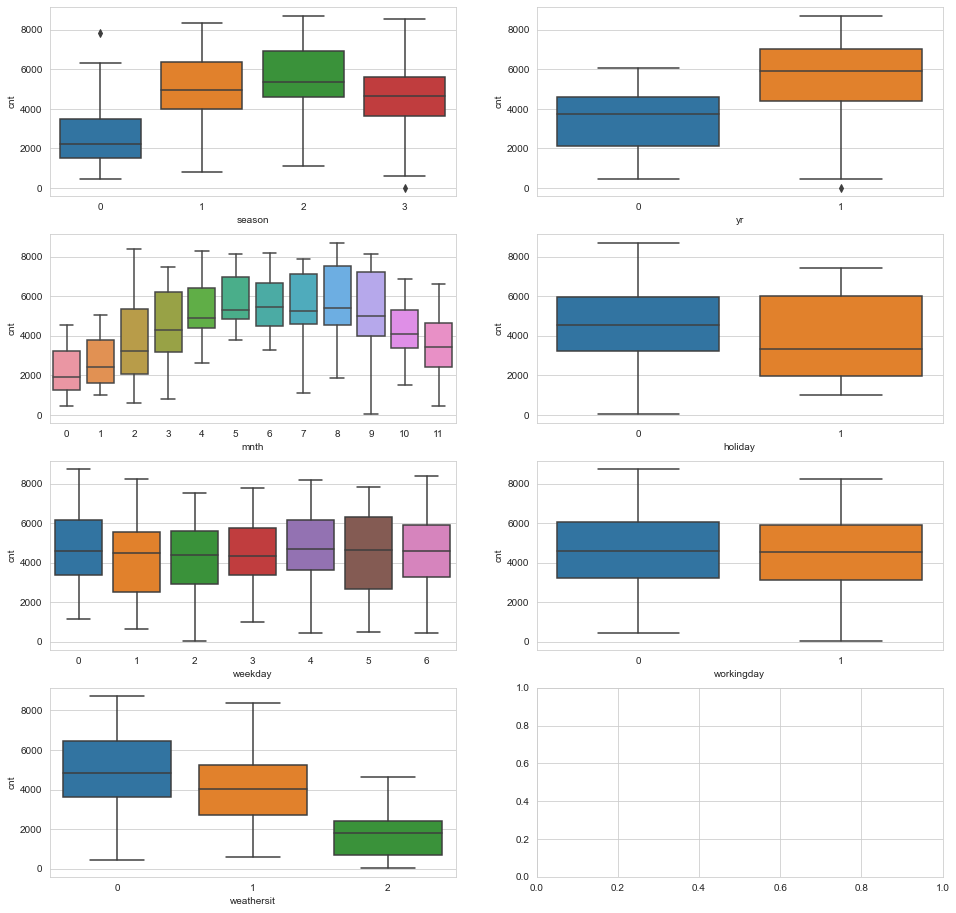

In [19]:

fig, axes = plt.subplots(4,2, figsize=(16,16))
sns.boxplot(data=df, x='season', y='cnt', ax=axes[0,0])
sns.boxplot(data=df, x='yr', y='cnt', ax=axes[0,1])
sns.boxplot(data=df, x='mnth', y='cnt', ax=axes[1,0])
sns.boxplot(data=df, x='holiday', y='cnt', ax=axes[1,1])
sns.boxplot(data=df, x='weekday', y='cnt', ax=axes[2,0])
sns.boxplot(data=df, x='workingday', y='cnt', ax=axes[2,1])
sns.boxplot(data=df, x='weathersit', y='cnt', ax=axes[3,0])


#### From the basic seasonality pattern and [0,0], [1,0] of this plot:
   1. Second and Third season shows considerable growth in business


*There is not Much impact of the day of the week, but holidays ofcourse affect the business


*Business Improved in Second Year


*Weather has impact on business


### Plotting the continuous variables against 'cnt'

<AxesSubplot:xlabel='registered', ylabel='cnt'>

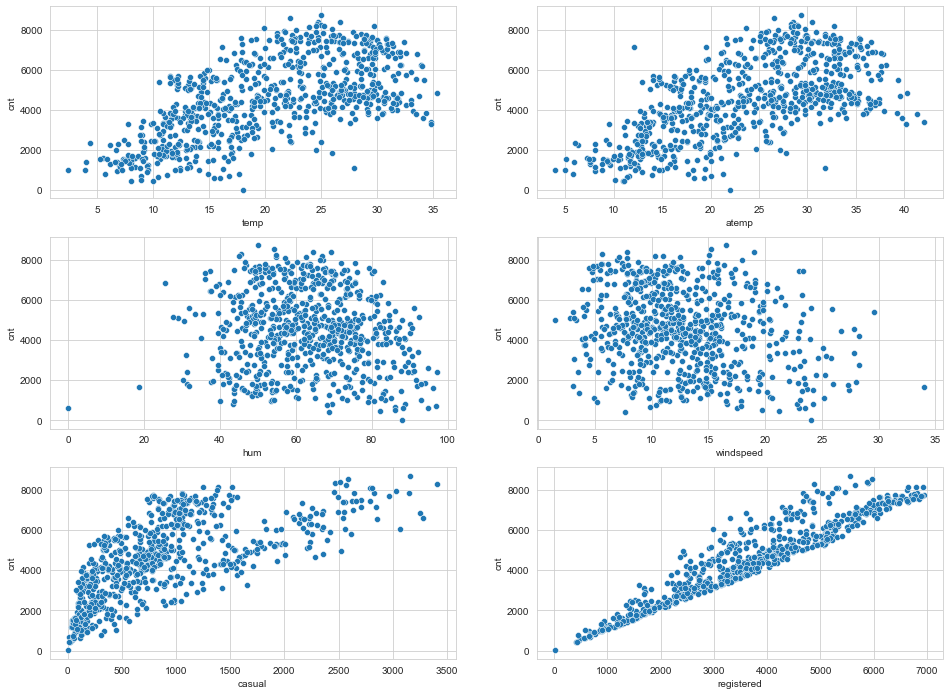

In [20]:

fig, axes = plt.subplots(3,2, figsize=(16,12))
sns.scatterplot(data=df, x='temp', y='cnt', ax=axes[0,0])
sns.scatterplot(data=df, x='atemp', y='cnt', ax=axes[0,1])
sns.scatterplot(data=df, x='hum', y='cnt', ax=axes[1,0])
sns.scatterplot(data=df, x='windspeed', y='cnt', ax=axes[1,1])
sns.scatterplot(data=df, x='casual', y='cnt', ax=axes[2,0])
sns.scatterplot(data=df, x='registered', y='cnt', ax=axes[2,1])



In [21]:
df = df.drop(['instant'], axis = 1)

* 'temp', 'atemp' shows high correlation with 'cnt'
* 'cnt' from the registered users are more predictable, and their variance easily explainable 
* 'casual' users also have high correlation with 'cnt'

# Preprocessing

#### Preparing Dummies

In [22]:

status = pd.get_dummies(df['weathersit'], drop_first = True).rename(columns = lambda x: 'weather'+str(x))
df = pd.concat([df, status], axis = 1)
df.drop(['weathersit'], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weather1,weather2
0,0,0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,0,0,0,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,0,0,0,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,0,0,0,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,0,0,0,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In the data dictionary we see 'weathersit' is described in 4 levels. But previously we have examined it to have only 3 levels. Most plausible explanation is that the last two levels have been clubbed together, as they indicate extreme weather conditions. Hence the encoding works like this:
                   Weather1 weather 2 ||
*Clear sky:               0   0
*Misty+Cloudy:            1   0
*Light snow+Heavy rain:   0   1

### Correlations

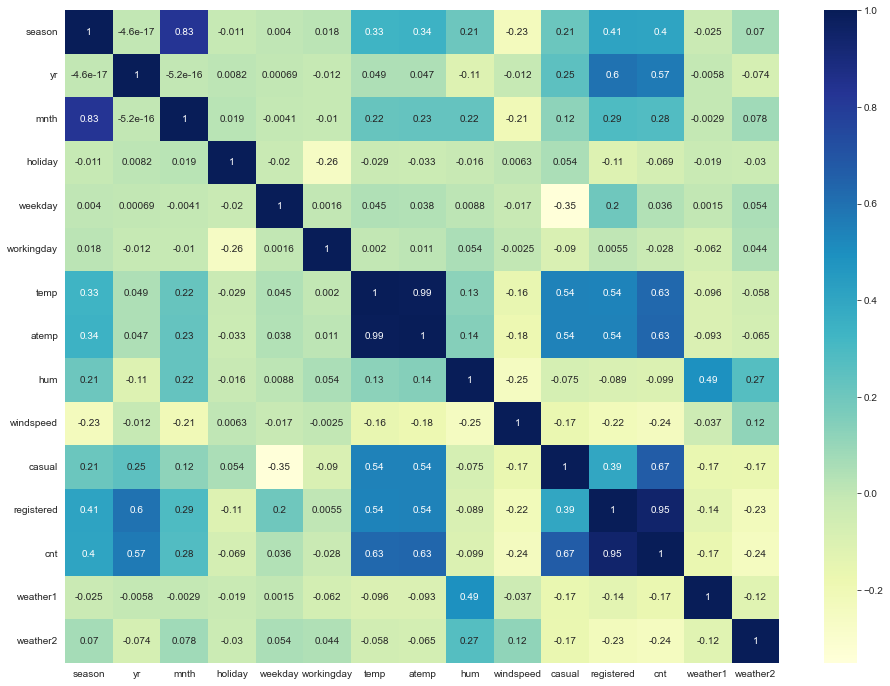

In [23]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

#### Scaling the Test set

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
numvars = ['temp','atemp','hum','windspeed','casual','registered','cnt' ]

In [28]:
df_train[numvars] = scaler.fit_transform(df_train[numvars])

In [29]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weather1,weather2
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,1.500000,0.513699,5.549658,0.027397,2.948630,0.726027,0.537414,0.513175,0.649499,0.319463,0.257519,0.525317,0.515792,0.342466,0.027397
std,1.120524,0.500241,3.477090,0.163378,1.947184,0.446377,0.225336,0.211663,0.144219,0.168114,0.205577,0.230345,0.225336,0.474941,0.163378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.096236,0.352512,0.350696,0.000000,0.000000
50%,2.000000,1.000000,6.000000,0.000000,3.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.218379,0.524329,0.522837,0.000000,0.000000
75%,2.250000,1.000000,9.000000,0.000000,5.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.333968,0.698924,0.691872,1.000000,0.000000
max,3.000000,1.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
X_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'weather1',
       'weather2'],
      dtype='object')

# Finding RFE support

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = LinearRegression(), n_features_to_select = 8)             
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', False, 4),
 ('yr', True, 1),
 ('mnth', False, 7),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 3),
 ('casual', True, 1),
 ('registered', True, 1),
 ('weather1', False, 5),
 ('weather2', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col
print('columns with rfe support{}'.format(col))

columns with rfe supportIndex(['yr', 'holiday', 'temp', 'atemp', 'hum', 'casual', 'registered',
       'weather2'],
      dtype='object')


#### Although 'season' and 'mnth' do not have RFE support, the visualizations show a solid relationship with 'cnt'.

In [36]:
X_train.columns[~rfe.support_]


Index(['season', 'mnth', 'weekday', 'workingday', 'windspeed', 'weather1'], dtype='object')

In [37]:
X_train_rfe = X_train[col]



# Fitting the data using Statsmodes.api

#### Backward  Modelling

In [38]:
import statsmodels.api as sm
X_train_1 = X_train_rfe
X_train_sm = sm.add_constant(X_train_1)



In [39]:
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary()) #next checking the VIF

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.617e+31
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:08:35   Log-Likelihood:                 19777.
No. Observations:                 584   AIC:                        -3.954e+04
Df Residuals:                     575   BIC:                        -3.950e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.99e-16   1.06e-16     -3.778      0.0

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif                     # we should definately remove 'atemp' from the model

,Features,VIF
3,atemp,378.39
2,temp,357.69
6,registered,17.58
4,hum,7.57
5,casual,4.21
0,yr,4.16
7,weather2,1.20
1,holiday,1.05


In [41]:
X_train_2 = X_train_1.drop('atemp', axis = 1)
X_train_sm1 = sm.add_constant(X_train_2)

In [42]:
lm1 = sm.OLS(y_train, X_train_sm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.602e+30
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:08:35   Log-Likelihood:                 19371.
No. Observations:                 584   AIC:                        -3.873e+04
Df Residuals:                     576   BIC:                        -3.869e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.441e-16   2.11e-16      2.101      0.0

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif                             # 'registered' as high collinearity with other variables

,Features,VIF
5,registered,17.28
2,temp,16.52
3,hum,7.27
4,casual,4.20
0,yr,4.11
6,weather2,1.19
1,holiday,1.05


In [44]:
X_train_3 = X_train_2.drop('registered', axis = 1)
X_train_sm2 = sm.add_constant(X_train_3)
lm2 = sm.OLS(y_train, X_train_sm2).fit()
print(lm2.summary())


# We will continue to work with lm2.
# Even at this early a level 'hum' does not add much to the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     331.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.26e-183
Time:                        18:08:35   Log-Likelihood:                 478.02
No. Observations:                 584   AIC:                            -942.0
Df Residuals:                     577   BIC:                            -911.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1363      0.023      5.931      0.0

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif                      # this model does not need the variable 'temp' as well

#it seems 'weather2' and 'hum' are good enough predictors for that

,Features,VIF
2,temp,10.05
3,hum,6.88
4,casual,4.16
0,yr,2.06
5,weather2,1.09
1,holiday,1.03


In [46]:
X_train_4 = X_train_3.drop('temp', axis = 1)
X_train_sm3 = sm.add_constant(X_train_4)
lm3 = sm.OLS(y_train, X_train_sm3).fit()
print(lm3.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.71e-128
Time:                        18:08:36   Log-Likelihood:                 346.53
No. Observations:                 584   AIC:                            -681.1
Df Residuals:                     578   BIC:                            -654.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2260      0.028      8.048      0.0

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif                       # although VIF has no variable on alert, 'hum' seems to have very low significance

,Features,VIF
2,hum,2.98
3,casual,2.64
0,yr,2.06
4,weather2,1.09
1,holiday,1.03


In [48]:
X_train_5 = X_train_4.drop('hum', axis = 1)
X_train_sm4 = sm.add_constant(X_train_5)
lm4 = sm.OLS(y_train, X_train_sm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     263.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          6.14e-129
Time:                        18:08:36   Log-Likelihood:                 345.15
No. Observations:                 584   AIC:                            -680.3
Df Residuals:                     579   BIC:                            -658.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.010     26.486      0.0

In [49]:


vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# now this model is stable, but it has a low accuracy
# I want to check whether an intercept is necessary in this model, the VIF of the constant is infact low
# If we follow the most conservative cutoff we should train the model without it aswell

,Features,VIF
0,const,3.34
3,casual,1.08
1,yr,1.05
4,weather2,1.03
2,holiday,1.00


In [50]:
lm41 = sm.OLS(y_train, X_train_5).fit()
print(lm41.summary())

# my conclusion is that the model has no significance for the intercept. 
# but the 'p-values' are not satisfactory.
# so I will check the VIF again

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1012.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                   7.63e-260
Time:                        18:08:36   Log-Likelihood:                          113.39
No. Observations:                 584   AIC:                                     -218.8
Df Residuals:                     580   BIC:                                     -201.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif                            # so the intercept was necessary to maintain the stability of lm4
# because now the model has two insignificant variables, although VIF is low.

,Features,VIF
0,yr,1.78
2,casual,1.77
1,holiday,1.02
3,weather2,1.01


In [52]:
X_train_5.columns

Index(['yr', 'holiday', 'casual', 'weather2'], dtype='object')

#### Some Experimental models

In [53]:
# what if we replace 'weather2' with 'temp'

X_train_x = X_train[['temp','yr','casual','holiday']]
X_train_smx = sm.add_constant(X_train_x)
lmx = sm.OLS(y_train, X_train_smx).fit()
print(lmx.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     444.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          6.81e-175
Time:                        18:08:36   Log-Likelihood:                 452.03
No. Observations:                 584   AIC:                            -894.1
Df Residuals:                     579   BIC:                            -872.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0921      0.013      7.191      0.0

In [54]:
# the model seems to perform better
# now I will check the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_x.columns
vif['VIF'] = [variance_inflation_factor(X_train_x.values, i) for i in range(X_train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif                          # There are no VIF>5

,Features,VIF
0,temp,4.19
2,casual,3.95
1,yr,1.94
3,holiday,1.02


In [55]:
X_train.columns

# The seasonality of weather is being captured by 'temp', we saw it's seasonality coincided with 'cnt'
# 'casual' showed high collinearity with the target variable in the plots
# this business successfully captures that business improves in second 'yr'
# in the plots we saw 'holiday' affecting the target
# we saw whether it is a 'workingday' or not does not affect the 'cnt'
# I will try adding 'mnth' which shows the same pattern as 'season', but has more information

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'weather1',
       'weather2'],
      dtype='object')

In [56]:
X_train_y = X_train[['temp','casual','yr','holiday','mnth']]
X_train_smy = sm.add_constant(X_train_y)
lmy = sm.OLS(y_train, X_train_smy).fit()
print(lmy.summary()) #lmy has no insignificant variable. 

# again checking Variation Inflation Factor

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     407.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.01e-186
Time:                        18:08:36   Log-Likelihood:                 482.74
No. Observations:                 584   AIC:                            -953.5
Df Residuals:                     578   BIC:                            -927.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0543      0.013      4.166      0.0

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_y.columns
vif['VIF'] = [variance_inflation_factor(X_train_y.values, i) for i in range(X_train_y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif    # let's try the model without 'temp' now

,Features,VIF
0,temp,6.33
1,casual,3.96
4,mnth,3.27
2,yr,1.96
3,holiday,1.03


In [58]:
X_train_z = X_train_y.drop('temp', axis = 1)
X_train_smz = sm.add_constant(X_train_z)
lmz = sm.OLS(y_train, X_train_smz).fit()
print(lmz.summary())             

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     308.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          8.48e-142
Time:                        18:08:36   Log-Likelihood:                 375.06
No. Observations:                 584   AIC:                            -740.1
Df Residuals:                     579   BIC:                            -718.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1857      0.012     15.211      0.0

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_z.columns
vif['VIF'] = [variance_inflation_factor(X_train_z.values, i) for i in range(X_train_z.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif                                  # lmz is stable, but it loses out on accuracy

,Features,VIF
0,casual,2.39
3,mnth,2.17
1,yr,1.90
2,holiday,1.03


##### I conclude that lm4, lmx, lmy, and lmz are all stable models.

now let's do the:

## Residual Analysis & Quantile2Quantile Plots

Text(0.5, 0, 'Errors')

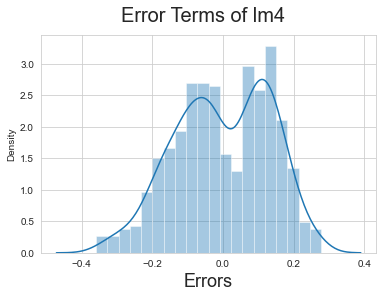

In [60]:
y_train_price_lm4 = lm4.predict(X_train_sm4)
fig = plt.figure()
sns.distplot((y_train - y_train_price_lm4), bins = 20)
fig.suptitle('Error Terms of lm4', fontsize = 20)                  # This does not look good
plt.xlabel('Errors', fontsize = 18) 

<function matplotlib.pyplot.show(close=None, block=None)>

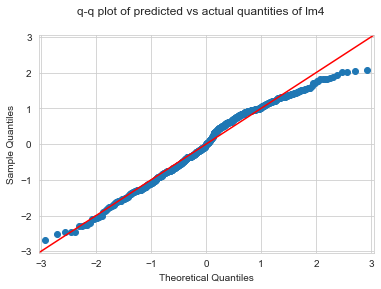

In [61]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

res4 = lm4.resid
fig = sm.qqplot(res4, stats.t, fit=True, line='45')
fig.suptitle('q-q plot of predicted vs actual quantities of lm4')
plt.show

Text(0.5, 0, 'Errors')

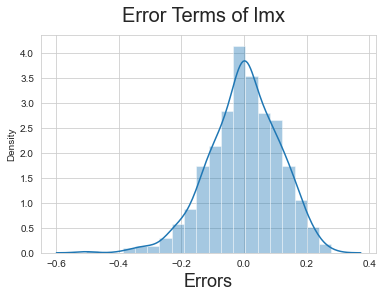

In [62]:
y_train_price_lmx = lmx.predict(X_train_smx)
fig = plt.figure()
sns.distplot((y_train - y_train_price_lmx), bins = 20)
fig.suptitle('Error Terms of lmx', fontsize = 20)                  # This looks very good
plt.xlabel('Errors', fontsize = 18)                                # checking the other two

<function matplotlib.pyplot.show(close=None, block=None)>

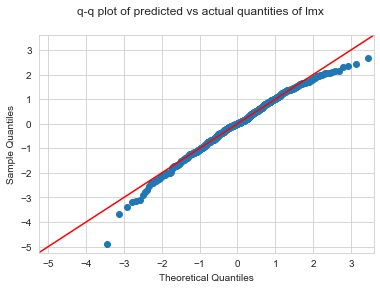

In [63]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

resx = lmx.resid
fig = sm.qqplot(resx, stats.t, fit=True, line='45')
fig.suptitle('q-q plot of predicted vs actual quantities of lmx')
plt.show

Text(0.5, 0, 'Errors')

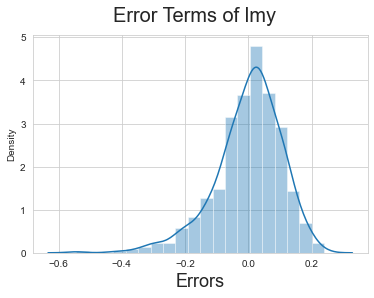

In [64]:
y_train_price_lmy = lmy.predict(X_train_smy)
fig = plt.figure()
sns.distplot((y_train - y_train_price_lmy), bins = 20)
fig.suptitle('Error Terms of lmy', fontsize = 20)# Error terms are normally distributed but the skew is not right
plt.xlabel('Errors', fontsize = 18)

#lmy is not bad aswell



<function matplotlib.pyplot.show(close=None, block=None)>

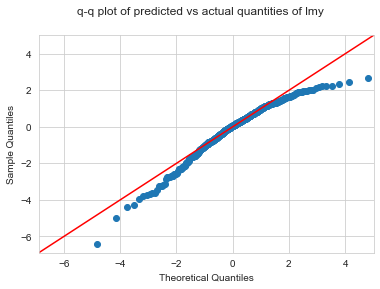

In [65]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

resy = lmy.resid
fig = sm.qqplot(resy, stats.t, fit=True, line='45')
fig.suptitle('q-q plot of predicted vs actual quantities of lmy')
plt.show

#but the qqplot deviates far from the 45degree line

Text(0.5, 0, 'Errors')

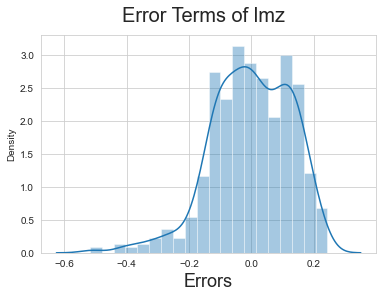

In [66]:
y_train_price_lmy = lmz.predict(sm.add_constant(X_train_z))
fig = plt.figure()
sns.distplot((y_train - y_train_price_lmy), bins = 20)
fig.suptitle('Error Terms of lmz', fontsize = 20)                  # This is not satisfactiry as well 
plt.xlabel('Errors', fontsize = 18)                                # lmx is the only satisfactory model

<function matplotlib.pyplot.show(close=None, block=None)>

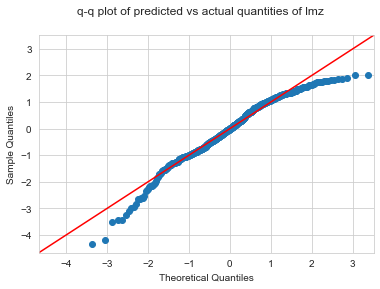

In [67]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

resz = lmz.resid
fig = sm.qqplot(resz, stats.t, fit=True, line='45')
fig.suptitle('q-q plot of predicted vs actual quantities of lmz')
plt.show

# qqplot is far off aswell

#### From the q-q plots and the residual plots it is evident that lmx has the best normality distribution.

# Predictions on Test set

In [68]:
#preprocessing

df_test[numvars] = scaler.transform(df_test[numvars])

## lmx

In [69]:
col = X_train_x.columns
col

Index(['temp', 'yr', 'casual', 'holiday'], dtype='object')

In [70]:
y_test = df_test['cnt']
X_test0 = df_test[col]
X_test0_sm = sm.add_constant(X_test0)
y_pred0 = lmx.predict(X_test0_sm)

Text(0, 0.5, 'y_pred')

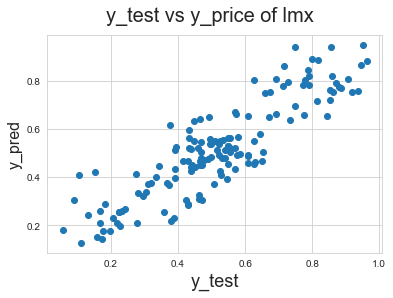

In [71]:
fig = plt.figure()
plt.scatter(y_test,y_pred0)
fig.suptitle('y_test vs y_price of lmx', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

Text(0, 0.5, 'y_pred')

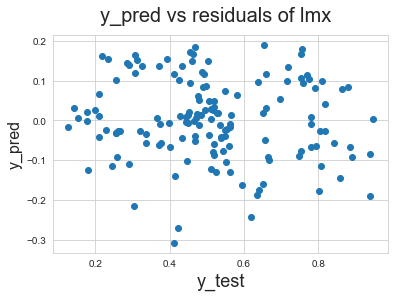

In [72]:
fig = plt.figure()
res_y = y_test-y_pred0
plt.scatter(y_pred0,res_y)
fig.suptitle('y_pred vs residuals of lmx', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

### Calculating accuracy

In [73]:
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.compat import lzip

# Calculating the cost function

In [74]:
df_copy = df.copy()
df_copy[numvars] = scaler.transform(df_copy[numvars])
df_copy1 = df_copy[col]

In [75]:
col

Index(['temp', 'yr', 'casual', 'holiday'], dtype='object')

In [76]:
df_copy
X = df_copy1
y = df_copy['cnt']
X['intercept'] = 1
X.reset_index()


,index,temp,yr,casual,holiday,intercept
0,0,0.355170,0,0.100274,0,1
1,1,0.379232,0,0.039317,0,1
2,2,0.171000,0,0.035965,0,1
3,3,0.175530,0,0.032307,0,1
4,4,0.209120,0,0.024383,0,1
...,...,...,...,...,...,...
725,725,0.243025,1,0.074672,0,1
726,726,0.241986,1,0.195672,0,1
727,727,0.241986,1,0.047851,0,1
728,728,0.245101,1,0.110332,0,1


In [77]:
X = np.array(X)
y = np.array(y)

In [78]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [79]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [80]:

theta = np.matrix(np.array([0,0,0,0,0]))
alpha = 0.01
iterations = 1000

In [81]:
gradient_descent_multi(X, y, theta, alpha, iterations)  # the cost function for this model is very low

# which is good

,Bets,cost
0,"[0.003125056966567142, 0.0032145950614326513, ...",0.153051
1,"[0.006199503199182698, 0.006376066042707932, 0...",0.148309
2,"[0.009224188474602855, 0.009485303578184414, 0...",0.143726
3,"[0.012199948290578555, 0.012543183341381556, 0...",0.139295
4,"[0.015127604105782334, 0.01555056629635257, 0....",0.135012
...,...,...
995,"[0.27403640365466214, 0.21121419139238706, 0.1...",0.007641
996,"[0.27411169732377544, 0.2112189574484764, 0.19...",0.007639
997,"[0.2741869535332493, 0.2112237076165976, 0.198...",0.007638
998,"[0.2742621722959646, 0.21122844193264492, 0.19...",0.007636


<AxesSubplot:xlabel='index'>

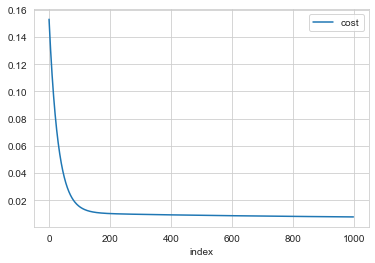

In [82]:
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])

#the descent also hugs the x axis

#### Let's train the model using sklearn

In [83]:
X_train_lm = X_train[col]
y_train_lm = y_train

In [84]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lmxsk = LinearRegression()

# Fit the model using lr.fit()
lmxsk.fit(X_train_lm, y_train_lm)

LinearRegression()

In [85]:
cols = X_train_lm.columns
print('intercept:{}'.format(lmxsk.intercept_))
print(cols,lmxsk.coef_)

intercept:0.09211052347276344
Index(['temp', 'yr', 'casual', 'holiday'], dtype='object') [ 0.4300332   0.20860137  0.34342424 -0.11026275]


In [86]:
print(lmx.summary() )   # So my initial prediction was misguided, infact the constant term has a very low coef

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     444.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          6.81e-175
Time:                        18:08:44   Log-Likelihood:                 452.03
No. Observations:                 584   AIC:                            -894.1
Df Residuals:                     579   BIC:                            -872.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0921      0.013      7.191      0.0

In [87]:
from sklearn.metrics import mean_squared_error

sqrt = np.sqrt(mean_squared_error(y_test, y_pred0))
print('mean squared error of {}'.format(sqrt))
print('R^2 of lmx is {}%'.format(round(lmx.rsquared*100,2)))

mean squared error of 0.1005095777299744
R^2 of lmx is 75.44%


### Final Model: 0.43 x 'temp' + 0.3434 x 'casual' + 0.2086 x 'yr' - 0.1103 x 'holiday' + 0.0921 = 'cnt'